<a href="https://colab.research.google.com/github/KuanChihLee/Deep-Learning_in_TensorFlow/blob/master/ST_DL_Assign_2_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import tensorflow as tf
from keras.callbacks import ModelCheckpoint

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

tf.__version__

Using TensorFlow backend.


'1.13.1'

In [0]:
cifar10 = tf.keras.datasets.cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_valid, y_valid = x_train[-5001:-1], y_train[-5001:-1]
x_train, y_train = x_train[:-5000], y_train[:-5000]

In [0]:
x_train.shape

(45000, 32, 32, 3)

In [0]:
x_valid.shape

(5000, 32, 32, 3)

In [0]:
x_train, x_test, x_valid = x_train / 255.0, x_test / 255.0, x_valid / 255.0

In [0]:
input_shape = x_train.shape[1:]

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
          
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
checkpoint_path = "training_1.hdf5"
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpointer = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir, 
                                                   monitor = 'val_acc',
                                                   verbose=1, 
                                                   save_best_only=True)

In [0]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

with tf.device('/gpu:0'):
  history = model.fit(x_train, 
                      y_train, 
                      epochs=100,
                      batch_size=64,
                      validation_data=(x_valid, y_valid),
                      callbacks=[checkpointer])

Found GPU at: /device:GPU:0
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
44928/45000 [============================>.] - ETA: 0s - loss: 1.9663 - acc: 0.2899
Epoch 00001: val_acc improved from -inf to 0.34540, saving model to training_1
45000/45000 [==============================] - 17s 368us/sample - loss: 1.9657 - acc: 0.2900 - val_loss: 1.9089 - val_acc: 0.3454
Epoch 2/100
44992/45000 [============================>.] - ETA: 0s - loss: 1.5124 - acc: 0.4413
Epoch 00002: val_acc improved from 0.34540 to 0.49160, saving model to training_1
45000/45000 [==============================] - 14s 315us/sample - loss: 1.5124 - acc: 0.4413 - val_loss: 1.4258 - val_acc: 0.4916
Epoch 3/100
44992/45000 [============================>.] - ETA: 0s - loss: 1.3775 - acc: 0.4987
Epoch 00003: val_acc improved from 0.49160 to 0.52400, saving model to training_1
45000/45000 [==============================] - 14s 314us/sample - loss: 1.3777 - acc: 0.4987 - val_loss: 1.3448 - val_acc: 0.5240
Ep

In [0]:
#%pwd
!ls 

sample_data


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 156us/sample - loss: 0.6309 - acc: 0.7830


[0.6308791948318482, 0.783]

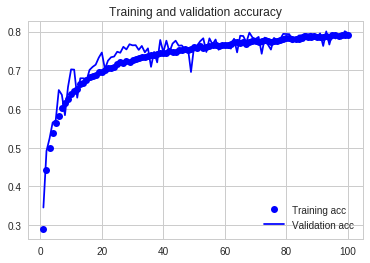

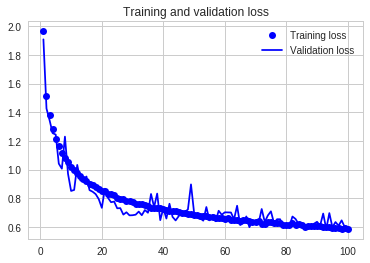

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%cd "/content/drive/My Drive/"

/content/drive/My Drive


In [0]:
new_model = tf.keras.models.load_model('./DL_Assignment_2/model/model.ckpt')
new_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_______________________________________

In [0]:
len(new_model.layers)

19

In [0]:
new_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 231us/sample - loss: 8.5968 - acc: 0.4583


[8.596827729797363, 0.4583]

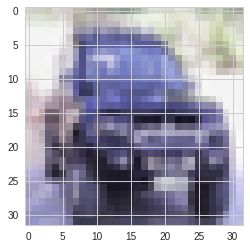

In [0]:
plt.imshow(x_test[9])

In [0]:
label_list = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 
              4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [0]:
print(label_list[y_test[9][0]])

automobile


In [0]:
layer_outputs = [layer.output for layer in new_model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = tf.keras.models.Model(inputs=new_model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
activations = activation_model.predict(np.reshape(x_test[9], (1,32,32,3))) # Returns a list of five Numpy arrays: one array per layer activation

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 28, 28, 32)


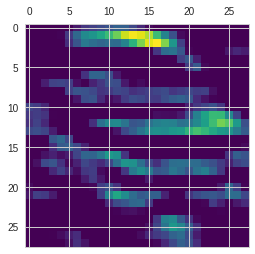

In [0]:
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


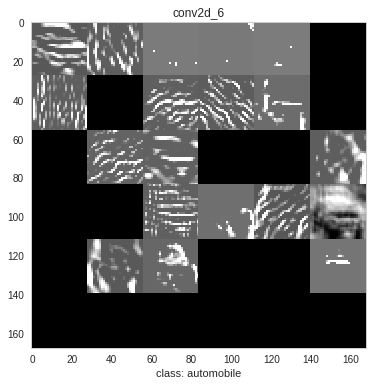

In [0]:
# Names of the layers, so you can have them as part of your plot
layer_names = []
for layer in new_model.layers[:12]:
    layer_names.append(layer.name) 

# Extracts the outputs of the top 12 layers
layer_outputs = [layer.output for layer in new_model.layers[:12]] 
# Creates a model that will return these outputs, given the model input
activation_model = tf.keras.models.Model(inputs=new_model.input, outputs=layer_outputs) 
# Predict one of test set picture
activations = activation_model.predict(np.reshape(x_test[9], (1,32,32,3)))
# Extract first layer output
first_layer_activation = activations[0]

images_per_col = 6
images_per_row = 6

# Number of features in the feature map
n_features = first_layer_activation.shape[-1] 
#The feature map has shape (1, size, size, n_features)
feature_size = first_layer_activation.shape[1] 
display_grid = np.zeros((feature_size * images_per_col, feature_size * images_per_row))
# Integrate feature maps into one display grid
for col in range(images_per_col):
  for row in range(images_per_row):
    if (col * images_per_row + row + 1) > n_features:
      break
    channel_image = first_layer_activation[0, :, :, col * images_per_row + row]
    channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    # Displays the grid
    display_grid[col * feature_size : (col + 1) * feature_size, 
                 row * feature_size : (row + 1) * feature_size] = channel_image
    
scale = 1. / feature_size
fig = plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
plt.title(layer_names[0])
plt.xlabel('class: '+str(label_list[y_test[9][0]]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='gray')
fig.savefig('Save_test.png')

In [0]:
layer_names = []
for layer in new_model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')